In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from empiricaldist import Pmf, Cdf
import scipy.stats as ss

In [3]:
hr_df = pd.read_csv(Path.cwd() / 'data' / 'HR-Employee-Attrition.csv')
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
pd.concat([hr_df.nunique(), hr_df.dtypes, hr_df.isna().sum()], axis=1).rename({0:'nunique', 1:'dtypes', 2:'isna'}, axis=1)

,nunique,dtypes,isna
Age,43,int64,0
Attrition,2,object,0
BusinessTravel,3,object,0
DailyRate,886,int64,0
Department,3,object,0
DistanceFromHome,29,int64,0
Education,5,int64,0
EducationField,6,object,0
EmployeeCount,1,int64,0
EmployeeNumber,1470,int64,0


ShapiroResult(statistic=0.9774479269981384, pvalue=2.0348782405724304e-14)

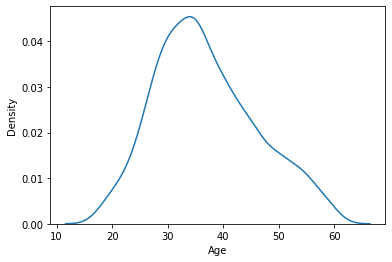

In [12]:
# Age
sns.kdeplot(hr_df['Age'])
ss.shapiro(hr_df['Age'])

In [15]:
# Attrition
hr_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [17]:
# BusinessTravel
hr_df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

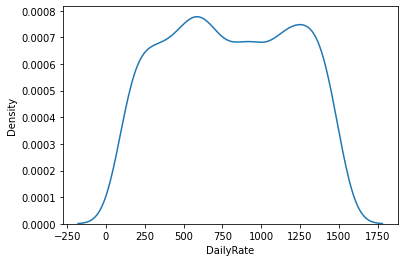

In [23]:
# DailyRate
sns.kdeplot(hr_df['DailyRate'])
hr_df['DailyRate'].describe()

In [27]:
# Department
hr_df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

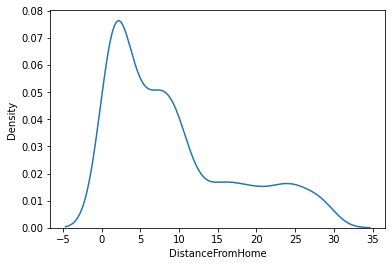

In [29]:
# DistanceFromHome
sns.kdeplot(hr_df['DistanceFromHome'])
hr_df['DistanceFromHome'].describe()

In [30]:
# Education → Category로 astype 필요
hr_df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [31]:
# EducationField
hr_df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [32]:
# EnvironmentSatisfaction → rank scale인데, nominal scale로 활용할지, ratio scale로 활용할지 고민
hr_df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [33]:
# Gender
hr_df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

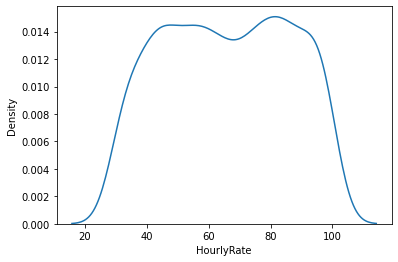

In [34]:
# HourlyRate
sns.kdeplot(hr_df['HourlyRate'])
hr_df['HourlyRate'].describe()

In [36]:
# JobInvolvement → rank scale인데, nominal scale로 활용할지, ratio scale로 활용할지 고민
# ratio scale로 활용
hr_df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [37]:
# JobLevel → rank scale인데, nominal scale로 활용할지, ratio scale로 활용할지 고민
# ratio scale로 활용
hr_df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [38]:
# JobRole
hr_df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [47]:
# Department, JobRole, EducationField 비교
# Random의 느낌이 강하나, 큰 이슈는 없는듯 → HR Major는 HR에만, Marketing Major는 Sales에만 있음
(hr_df[['Department', 'JobRole', 'EducationField']]
 .value_counts()
 .reset_index(name='Count')
 .sort_values(by=['Department', 'JobRole', 'Count'], ascending=[True, True, False])
)

,Department,JobRole,EducationField,Count
19,Human Resources,Human Resources,Human Resources,21
29,Human Resources,Human Resources,Life Sciences,13
31,Human Resources,Human Resources,Medical,11
39,Human Resources,Human Resources,Technical Degree,4
42,Human Resources,Human Resources,Other,3
34,Human Resources,Manager,Human Resources,6
40,Human Resources,Manager,Life Sciences,3
44,Human Resources,Manager,Medical,2
8,Research & Development,Healthcare Representative,Life Sciences,60
10,Research & Development,Healthcare Representative,Medical,48


In [48]:
# JobSatisfaction → rank scale인데, nominal scale로 활용할지, ratio scale로 활용할지 고민
# ratio scale로 활용
hr_df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [49]:
# MaritalStatus
hr_df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

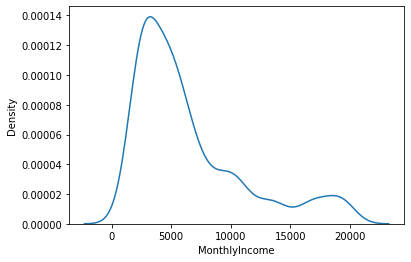

In [50]:
# MonthlyIncome
sns.kdeplot(hr_df['MonthlyIncome'])
hr_df['MonthlyIncome'].describe()

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

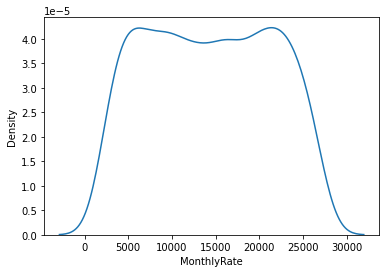

In [52]:
# MonthlyRate
sns.kdeplot(hr_df['MonthlyRate'])
hr_df['MonthlyRate'].describe()

In [53]:
# DailyRate & HourlyRate & MonthlyIncome & MonthlyRate
# correlation이 이렇게 낮은게 말이 되나..?
# randomized된 자료 작성으로 보이므로, 불필요한 데이터 삭제 필요
hr_df[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']].corr()

,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate
DailyRate,1.000000,0.023381,0.007707,-0.032182
HourlyRate,0.023381,1.000000,-0.015794,-0.015297
MonthlyIncome,0.007707,-0.015794,1.000000,0.034814
MonthlyRate,-0.032182,-0.015297,0.034814,1.000000


In [98]:
# Attrition과 비교하여 correlation이 높은 하나의 데이터를 제외하고 삭제
# MonthlyIncome의 correlation이 0.15이므로 이것만 남겨두는 형태
hr_df['Attrition'].replace({'No':1, 'Yes':0}).corr(hr_df['MonthlyIncome'])

0.15983958238498883

In [54]:
# NumCompaniesWorked → 다른 자료와 결합하여 Category로 astype 필요
hr_df['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [56]:
# OverTime
hr_df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

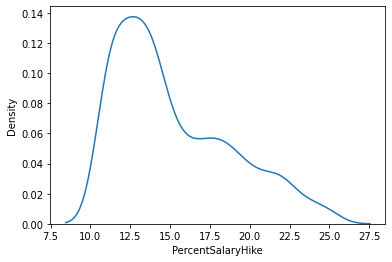

In [57]:
# PercentSalaryHike
sns.kdeplot(hr_df['PercentSalaryHike'])
hr_df['PercentSalaryHike'].describe()

In [58]:
# PerformanceRating → rank scale인데, nominal scale로 활용할지, ratio scale로 활용할지 고민
# ratio scale로 활용
hr_df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [59]:
# RelationshipSatisfaction → rank scale인데, nominal scale로 활용할지, ratio scale로 활용할지 고민
# ratio scale로 활용
hr_df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [60]:
# StockOptionLevel → rank scale인데, nominal scale로 활용할지, ratio scale로 활용할지 고민
# ratio scale로 활용
hr_df['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

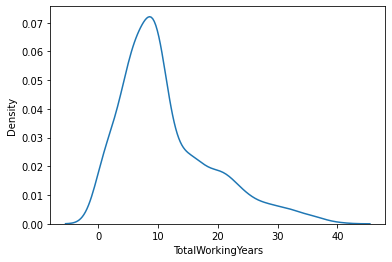

In [62]:
# TotalWorkingYears
sns.kdeplot(hr_df['TotalWorkingYears'])
hr_df['TotalWorkingYears'].describe()

count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

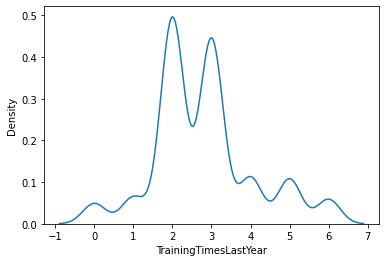

In [63]:
# TrainingTimesLastYear
sns.kdeplot(hr_df['TrainingTimesLastYear'])
hr_df['TrainingTimesLastYear'].describe()

In [65]:
# WorkLifeBalance → rank scale인데, nominal scale로 활용할지, ratio scale로 활용할지 고민
# ratio scale로 활용
hr_df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

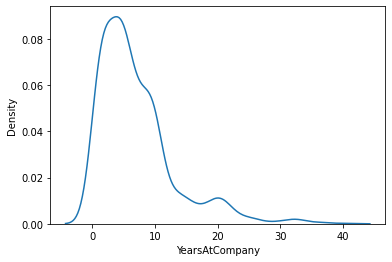

In [66]:
# YearsAtCompany
sns.kdeplot(hr_df['YearsAtCompany'])
hr_df['YearsAtCompany'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

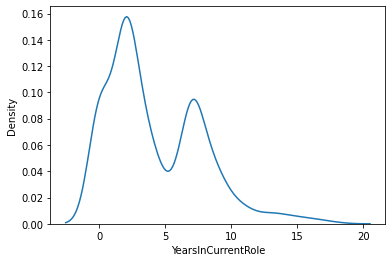

In [67]:
# YearsInCurrentRole
sns.kdeplot(hr_df['YearsInCurrentRole'])
hr_df['YearsInCurrentRole'].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

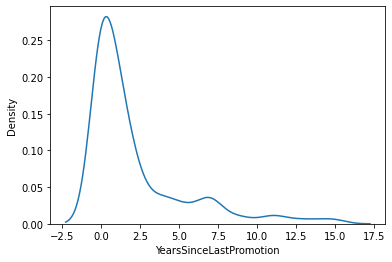

In [70]:
# YearsSinceLastPromotion
sns.kdeplot(hr_df['YearsSinceLastPromotion'])
hr_df['YearsSinceLastPromotion'].describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

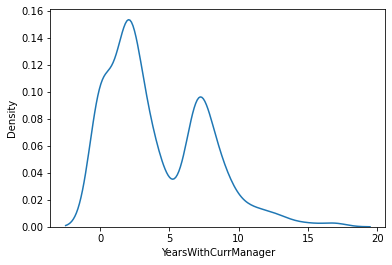

In [71]:
# YearsWithCurrManager
sns.kdeplot(hr_df['YearsWithCurrManager'])
hr_df['YearsWithCurrManager'].describe()

In [73]:
# 총 경력과 현재 회사 경력 비교 → 오류 없음
(hr_df['TotalWorkingYears'] >= hr_df['YearsAtCompany']).sum()

1470

In [89]:
# 입사 전 총 경력과 이전 재직 회사 수(0 ~ 9) 비교
# Randomized Data라서 그런지 값이 이상한 형태 → 입사전 총 경력에 비해 Worked한 Company가 너무 많음
(pd.concat([hr_df['TotalWorkingYears'] - hr_df['YearsAtCompany'], hr_df['NumCompaniesWorked']], axis=1)
 .rename({0:'WorkingYearsBeforeCompany'}, axis=1)
)

,WorkingYearsBeforeCompany,NumCompaniesWorked
0,2,8
1,0,1
2,7,6
3,0,1
4,4,9
...,...,...
1465,12,4
1466,2,4
1467,0,1
1468,8,2


In [91]:
# utils에 해당 내용 function으로 추가
# 이전 회사 평균 재직기간이 1년 이하인 경우 '잦은 이직'으로 간주
(hr_df.assign(Experienced=lambda df: np.where(df['NumCompaniesWorked'] == 0, 'NewEmp', 
                                              np.where((df['TotalWorkingYears'] - df['YearsAtCompany']) / df['NumCompaniesWorked'] <= 1, 'FreqMove', 'ExpEmp')))
 ['Experienced'].value_counts()
)

FreqMove    863
ExpEmp      410
NewEmp      197
Name: Experienced, dtype: int64

In [99]:
# Category로 astype 필요한 Feature들 모음
astype_category = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction',
                   'Gender', 'JobRole', 'MaritalStatus', 'OverTime']